# Puff Model Scratch Work

### Original Model

In [ ]:
conda install basemap

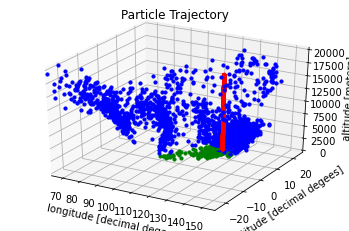

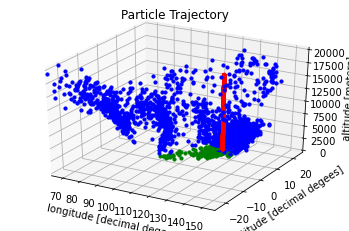

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.basemap import Basemap

from parameters import *
from variables import *
from initial import *
from advectionx import*
from advectiony import*
from advectionz import*
from dispersionx import *
from dispersiony import *
from dispersionz import *
from degree_conversion import *
from settling import *
from landed import *

#[height,lat,lon]; [z,y,x]
Rold = initial(sigma_lat,sigma_lon)

lon1 = 65.
lon2 = 155.
lat1 = -25.
lat2 = 25.

fig = plt.figure(1,facecolor = 'white')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('longitude [decimal degees]')
ax.set_ylabel('latitude [decimal degees]')
ax.set_zlabel('altitude [meters]')
ax.set_zlim(0,20000)
ax.set_ylim(lat1,lat2)
ax.set_xlim(lon1,lon2)
ax.scatter(Rold[:,2],Rold[:,1],Rold[:,0],c='r',s=10)
ax.set_title('Particle Trajectory')


plt.figure(2)
#m = Basemap(llcrnrlon=lon1,llcrnrlat=lat1,urcrnrlon=lon2,urcrnrlat=lat2,
            #projection='lcc',lon_0=start_lon,lat_0=start_lat,
            #resolution ='l',area_thresh=1000.)
#m.drawcoastlines(linewidth=0.25)
#m.drawcountries(linewidth=0.25)
#m.drawparallels(np.arange(lat1,lat2,10),labels=[1,1,0,0])
#m.drawmeridians(np.arange(lon1,lon2,10),labels=[0,0,0,1])
#x, y = m(Rold[:,2],Rold[:,1])
#m.scatter(x,y,s=20,marker='o',color='r',zorder=10)
#plt.title('Particle Trajectory')

j=3
for t in range(1,time_steps):
    t_index = int(float(t)/float(time_steps)*20.)
    t_time_1 = float(t)/float(time_steps)*20.
    t_time_2 = (float(t)+0.5)/float(time_steps)*20.
    t_time_3 = (float(t)+0.5)/float(time_steps)*20.
    t_time_4 = (float(t)+1.0)/float(time_steps)*20.    
    
    dx_lat, dx_lon = degree_to_dx(R)
    
    #RUNGA KUTTA 
    R_step1[:,:] = 0.0
    R_step2[:,:] = 0.0
    R_step3[:,:] = 0.0
    R_step4[:,:] = 0.0
    #dispersion
    dispz_temp = dispersionz(Active) * dt
    dispy_temp = dispersiony(Active) * dt / dx_lat
    dispx_temp = dispersionx(Active) * dt / dx_lon
    R_step1[:,0] += dispz_temp
    R_step2[:,0] += dispz_temp
    R_step3[:,0] += dispz_temp
    R_step4[:,0] += dispz_temp
    R_step1[:,1] += dispy_temp
    R_step2[:,1] += dispy_temp
    R_step3[:,1] += dispy_temp
    R_step4[:,1] += dispy_temp
    R_step1[:,2] += dispx_temp
    R_step2[:,2] += dispx_temp
    R_step3[:,2] += dispx_temp
    R_step4[:,2] += dispx_temp
    
    #settling
    R_step1[:,0] -= settling(D,Active) * dt
    R_step2[:,0] -= settling(D,Active) * dt
    R_step3[:,0] -= settling(D,Active) * dt
    R_step4[:,0] -= settling(D,Active) * dt
    
    R_step1[:,0] += advectionz(Rold,Active,t_index,t_time_1) * dt
    R_step1[:,1] += advectiony(Rold,Active,t_index,t_time_1) * dt / dx_lat
    R_step1[:,2] += advectionx(Rold,Active,t_index,t_time_1) * dt / dx_lon
    R_step2[:,0] += advectionz(Rold+R_step1/2.0,Active,t_index,t_time_2) * dt
    R_step2[:,1] += advectiony(Rold+R_step1/2.0,Active,t_index,t_time_2) * dt / dx_lat
    R_step2[:,2] += advectionx(Rold+R_step1/2.0,Active,t_index,t_time_2) * dt / dx_lon
    R_step3[:,0] += advectionz(Rold+R_step2/2.0,Active,t_index,t_time_3) * dt
    R_step3[:,1] += advectiony(Rold+R_step2/2.0,Active,t_index,t_time_3) * dt / dx_lat
    R_step3[:,2] += advectionx(Rold+R_step2/2.0,Active,t_index,t_time_3) * dt / dx_lon
    R_step4[:,0] += advectionz(Rold+R_step3,Active,t_index,t_time_4) * dt
    R_step4[:,1] += advectiony(Rold+R_step3,Active,t_index,t_time_4) * dt / dx_lat
    R_step4[:,2] += advectionx(Rold+R_step3,Active,t_index,t_time_4) * dt / dx_lon

    Rnew =  Rold + R_step1/6.0 + R_step2/3.0 + R_step3/3.0 + R_step4/6.0    
    Active, Rnew[:,0] = landed(Rnew[:,0],Active)
    
    if t%(time_steps/50)==0:
        ax.scatter(Rnew[:,2],Rnew[:,1],Rnew[:,0],c='k',s=1,alpha=float(t)/float(time_steps-1)*0.5)
        plt.figure(2,facecolor='white')
        x, y = m(Rnew[:,2],Rnew[:,1])
        m.scatter(x,y,s=1,marker='o',color='k',alpha=float(t)/float(time_steps-1)*0.5,zorder=10)
        print(str(int(100.*float(t)/float(time_steps-1))) + '% done')
    if t%(time_steps/10)==0:
        plt.figure(j)
        #m = Basemap(llcrnrlon=lon1,llcrnrlat=lat1,urcrnrlon=lon2,urcrnrlat=lat2,
            #projection='lcc',lon_0=start_lon,lat_0=start_lat,
            #resolution ='l',area_thresh=1000.)
        #m.drawcoastlines(linewidth=0.25)
        #m.drawcountries(linewidth=0.25)
        #m.drawparallels(np.arange(lat1,lat2,10),labels=[1,1,0,0])
        #m.drawmeridians(np.arange(lon1,lon2,10),labels=[0,0,0,1])
        #x, y = m(start_lon,start_lat)
        #m.scatter(x,y,s=20,marker='o',color='r',zorder=10)
        #x, y = m(Rnew[:,2],Rnew[:,1])
        #m.scatter(x,y,s=2,marker='o',color='k',zorder=10,alpha=0.5)
        plt.title('Plume after ' + str((j-2)*12) + ' hrs')

        fig = plt.figure(j+10,facecolor = 'white')
        axx = fig.add_subplot(111, projection='3d')
        axx.set_xlabel('longitude [decimal degees]')
        axx.set_ylabel('latitude [decimal degees]')
        axx.set_zlabel('altitude [meters]')
        axx.set_zlim(0,20000)
        axx.set_ylim(lat1,lat2)
        axx.set_xlim(lon1,lon2)
        axx.scatter(Rnew[:,2],Rnew[:,1],Rnew[:,0],c='k',s=1)
        axx.set_title('Plume after ' + str((j-2)*12) + ' hrs')
        j+=1
        
    Rold = Rnew

for i in range(0,num_particles):
    if Active[i] == 0:
        ax.scatter(Rnew[i,2],Rnew[i,1],Rnew[i,0],c='g',s=10)
        plt.figure(2,facecolor='white')
        #x, y = m(Rnew[i,2],Rnew[i,1])
        #m.scatter(x,y,s=2,marker='o',color='g',zorder=10)
    else:
        ax.scatter(Rnew[i,2],Rnew[i,1],Rnew[i,0],c='b',s=10)
        plt.figure(2,facecolor='white')
        #x, y = m(Rnew[i,2],Rnew[i,1])
        #m.scatter(x,y,s=10,marker='o',color='b',zorder=10)
        
plt.figure(1,facecolor='white')

In [2]:
plt.figure(13,facecolor='white')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
plt.figure(14,facecolor='white')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D